In [2]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
csv_path = os.path.join('csv', 'result2_sorted.csv')
df = pd.read_csv(csv_path)
df

,Photo,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,MRI_A,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
1,MRI_B,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Fail,Pass
2,MRI_C,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
3,MRI_D,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
4,MRI_E,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MRI_P,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Fail,Pass,Pass,Pass,Pass
76,MRI_Q,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass
77,MRI_R,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass
78,MRI_S,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass


In [6]:
# Define all attack column
att_column = df.iloc[:,2:20].columns

# Conver all att coloumn into integer
for x in range(len(att_column)):
    df[att_column[x]] = df[att_column[x]].map({'Pass': 1, 'Fail': 0})

df

,Photo,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,MRI_A,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
1,MRI_B,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
2,MRI_C,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
3,MRI_D,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
4,MRI_E,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MRI_P,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
76,MRI_Q,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
77,MRI_R,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
78,MRI_S,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1


In [18]:
df = df.drop(columns = ['Photo'])
df

,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
1,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
2,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
3,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
4,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
76,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
77,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
78,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1


In [83]:
mask = df['Algorithm'] == 'algo_a'
df_a = df[mask]
df_a

,Photo,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,MRI_A,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
1,MRI_B,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
2,MRI_C,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
3,MRI_D,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
4,MRI_E,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
5,MRI_F,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
6,MRI_G,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
7,MRI_H,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
8,MRI_I,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
9,MRI_J,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1


In [110]:
# df_sum = df.groupby(['Algorithm'], as_index=False).sum()
df_sum = df.groupby(['Algorithm']).sum()
# df_sum = df_sum.transpose()
df_sum

,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
Algorithm,,,,,,,,,,,,,,,,,,
algo_a,20,20,20,0,20,0,20,0,20,20,20,0,20,0,0,0,19,20
algo_b,0,0,20,20,20,0,0,0,20,0,20,0,20,0,0,0,20,0
algo_c,20,9,20,20,20,0,20,1,20,19,20,0,20,0,0,0,20,20
algo_d,20,20,20,20,20,20,20,17,20,20,20,5,1,15,20,20,20,20


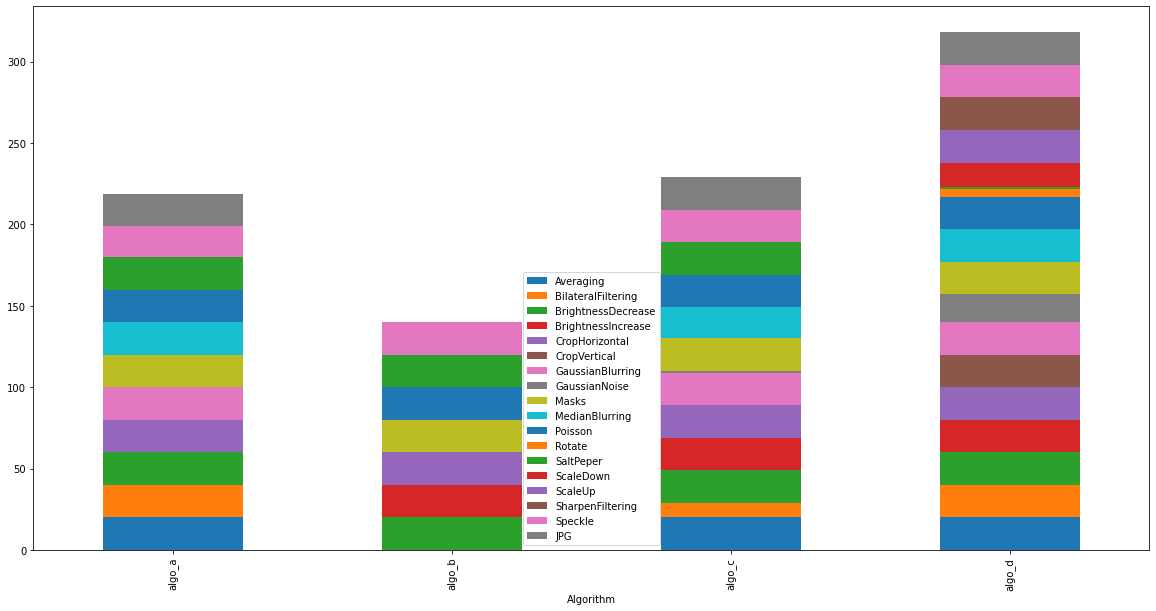

In [111]:
s = df_sum
p1 = s.plot(kind='bar', stacked=True, figsize=(20, 10) )

In [105]:
# df_sum = df.groupby(['Algorithm'], as_index=False).sum()
df_sum = df.groupby(['Algorithm']).sum()
df_sum_t = df_sum.transpose()

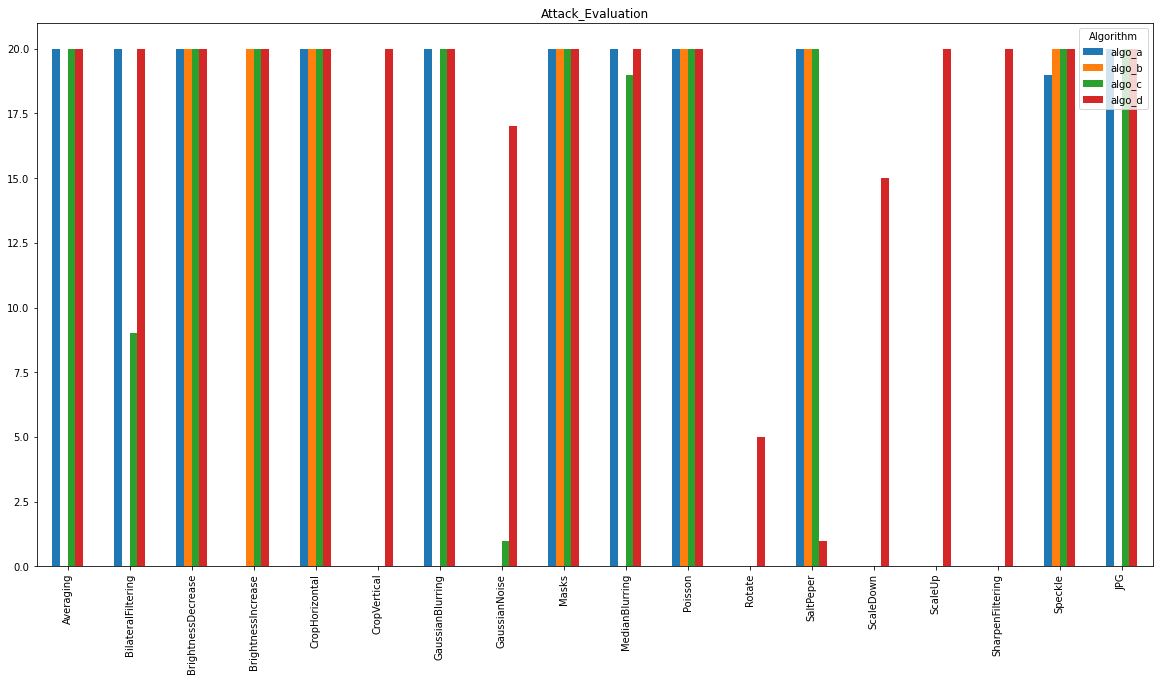

In [107]:
s = df_sum_t
p1 = s.plot(kind='bar', figsize=(20, 10), title='Attack_Evaluation')
# p1 = s.plot(kind='bar', stacked = True, figsize=(20, 10))

In [109]:
pieton = {}
for col in columns:
    pieton[col] = np.sum(df_sum_t.pieton[df_sum_t[col] == 1])
pieton.pop('pieton', None)
plt.bar(range(len(pieton)), pieton.values(), align='center')
plt.xticks(range(len(pieton)), pieton.keys())
plt.title("Who got an accident with a pedestrian?")
plt.legend(loc='best')
plt.show()

NameError: name 'columns' is not defined

No handles with labels found to put in legend.


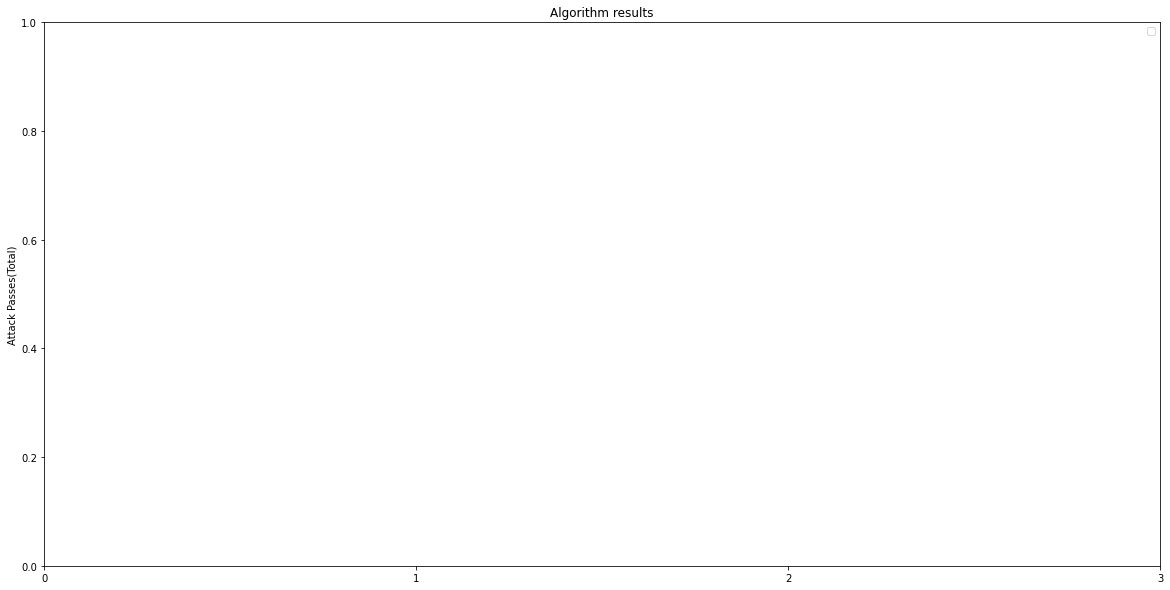

In [96]:
    import matplotlib.pyplot as plt
    import numpy as np
    width = 0.15
    # Initialise a figure. subplots() with no args gives one plot.
    fig, ax = plt.subplots(figsize=(20, 10))

    # A little data preparation
    algorithm = df_sum['algo_a'] # Attacking Method
    x = np.arange(len(algorithm))

    # Plot each bar plot. Note: manually calculating the 'dodges' of the bars
#     ax.bar(x - 3*width/2, df_sum.to_list(), width, label='Averaging', color='#0343df')
#     ax.bar(x - width/2, df_sum['BilateralFiltering'].to_list(), width, label='BilateralFiltering', color='#e50000')
#     ax.bar(x + width/2, df_sum['BrightnessDecrease'].to_list(), width, label='BrightnessDecrease', color='#ffff14')
#     ax.bar(x + 3*width/2, df_sum['BrightnessIncrease'].to_list(), width, label='BrightnessIncrease', color='#929591')

    # Customise some display properties
    ax.set_ylabel('Attack Passes(Total)')
    ax.set_title('Algorithm results')
    ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
    #ax.set_xticklabels(algorithm.astype(str).values, rotation='vertical')
    ax.legend()

    # Ask Matplotlib to show the plot
    plt.show()

KeyError: 'Algorithm'

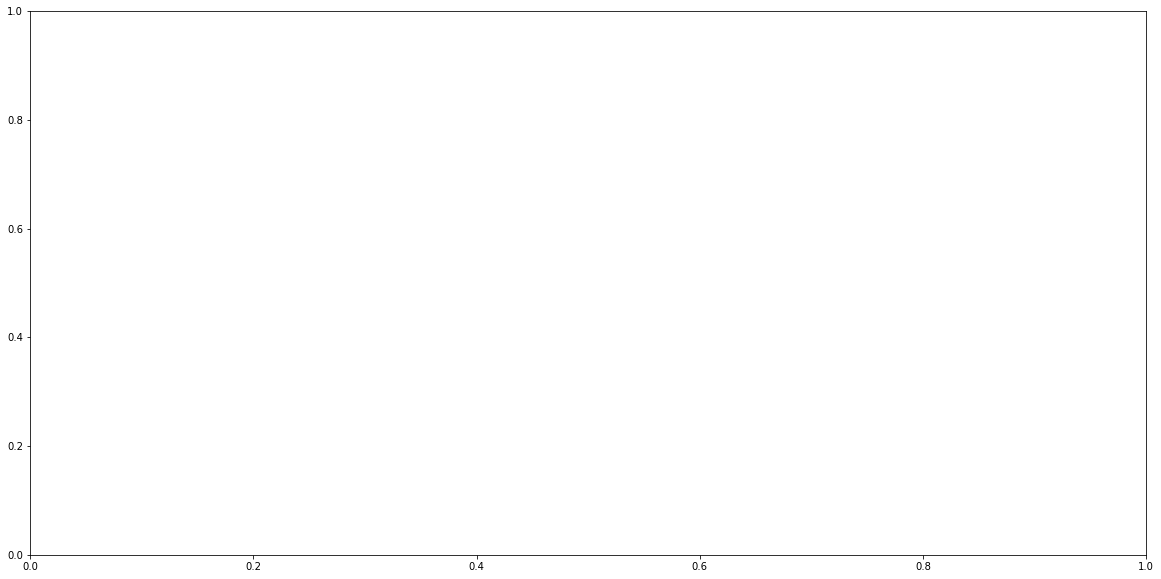

In [78]:
    import matplotlib.pyplot as plt
    import numpy as np
    width = 0.15
    # Initialise a figure. subplots() with no args gives one plot.
    fig, ax = plt.subplots(figsize=(20, 10))

    # A little data preparation
    algorithm = df_sum['Algorithm'].to_list() # Attacking Method
    x = np.arange(len(algorithm))

    # Plot each bar plot. Note: manually calculating the 'dodges' of the bars
    ax.bar(x - 3*width/2, df_sum['Averaging'].to_list(), width, label='Averaging', color='#0343df')
    ax.bar(x - width/2, df_sum['BilateralFiltering'].to_list(), width, label='BilateralFiltering', color='#e50000')
    ax.bar(x + width/2, df_sum['BrightnessDecrease'].to_list(), width, label='BrightnessDecrease', color='#ffff14')
    ax.bar(x + 3*width/2, df_sum['BrightnessIncrease'].to_list(), width, label='BrightnessIncrease', color='#929591')

    # Customise some display properties
    ax.set_ylabel('Attack Passes(Total)')
    ax.set_title('Algorithm  results')
    ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
    #ax.set_xticklabels(algorithm.astype(str).values, rotation='vertical')
    ax.legend()

    # Ask Matplotlib to show the plot
    plt.show()